In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [2]:
import matplotlib.pyplot as plt

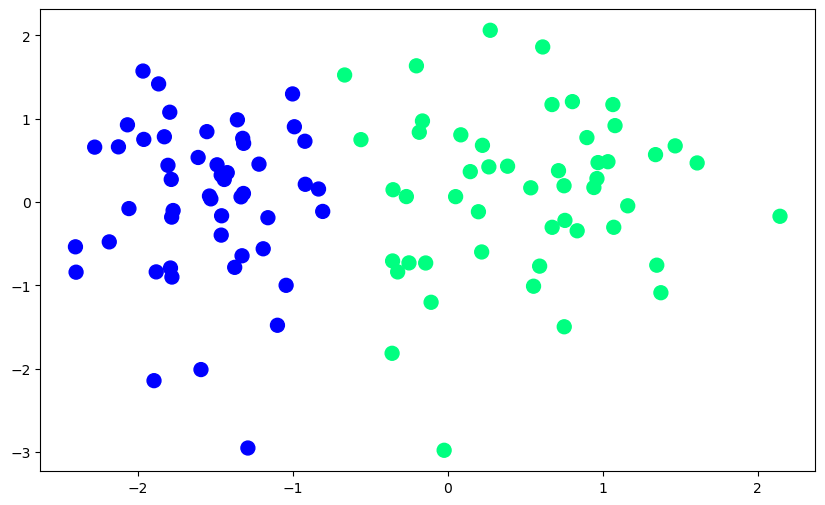

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [4]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        

In [5]:
def step(z):
    return 1 if z>0 else 0

In [6]:
intercept_,coef_ = perceptron(X,y)

In [7]:
print(coef_)
print(intercept_)

[1.24246299 0.03764872]
1.0


In [8]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [9]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

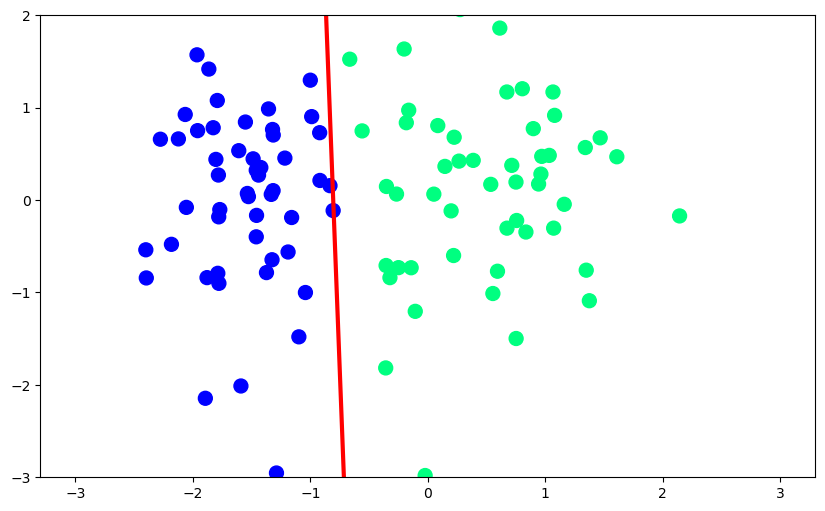

In [15]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [2]:
import gym
import numpy as np

env = gym.make("CartPole-v1")
n_states = 40  # Discretize continuous state space

def discretize(obs, bins):
    upper_bounds = env.observation_space.high
    lower_bounds = env.observation_space.low
    ratios = [(obs[i] + abs(lower_bounds[i])) / (upper_bounds[i] - lower_bounds[i]) for i in range(len(obs))]
    new_obs = [int(round((n_states - 1) * ratios[i])) for i in range(len(obs))]
    return tuple(min(n_states - 1, max(0, x)) for x in new_obs)

q_table = np.random.uniform(low=0, high=1, size=([n_states] * 4 + [env.action_space.n]))

alpha = 0.1      # learning rate
gamma = 0.99     # discount factor
epsilon = 0.1    # exploration rate

for episode in range(1000):
    obs = discretize(env.reset()[0], n_states)
    total_reward = 0
    done = False

    while not done:
        if np.random.random() < epsilon:
            action = env.action_space.sample()  # explore
        else:
            action = np.argmax(q_table[obs])  # exploit

        next_obs_raw, reward, done, _, _ = env.step(action)
        next_obs = discretize(next_obs_raw, n_states)
        best_next_action = np.argmax(q_table[next_obs])
        td_target = reward + gamma * q_table[next_obs][best_next_action]
        q_table[obs][action] += alpha * (td_target - q_table[obs][action])

        obs = next_obs
        total_reward += reward

    if episode % 100 == 0:
        print(f"Episode {episode}, Total Reward: {total_reward}")

env.close()


C:\Users\sachi\AppData\Local\Temp\ipykernel_8376\1960880200.py:10: RuntimeWarning: overflow encountered in scalar subtract
  ratios = [(obs[i] + abs(lower_bounds[i])) / (upper_bounds[i] - lower_bounds[i]) for i in range(len(obs))]
c:\Users\sachi\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 0, Total Reward: 12.0
Episode 100, Total Reward: 14.0
Episode 200, Total Reward: 10.0
Episode 300, Total Reward: 12.0
Episode 400, Total Reward: 17.0
Episode 500, Total Reward: 15.0
Episode 600, Total Reward: 11.0
Episode 700, Total Reward: 32.0
Episode 800, Total Reward: 11.0
Episode 900, Total Reward: 10.0


multi class classifier=
https://colab.research.google.com/drive/1SqETl3Zi1EEesdJfEv6_QimB-M-YjKGx?usp=sharing